In [1]:
from model.finite import solve_laplace
from model.finite import generate_rho
from model.iterate import generate_mesh, relax, generate_rho, update_bc
import matplotlib.pyplot as plt
from numba import jit, njit, prange, set_num_threads

set_num_threads(8)

## Sparse matrix solver

In [2]:
rho = generate_rho(N=32, xmin=-5, xmax=5, ymin=-5, ymax=5)
dx = 10/32
%timeit solve_laplace(N=32, rho=rho.flatten(), dx=dx)

7.98 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [3]:
rho = generate_rho(N=64, xmin=-5, xmax=5, ymin=-5, ymax=5)
dx = 10/64
%timeit solve_laplace(N=64, rho=rho.flatten(), dx=dx)

85.4 ms ± 807 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
rho = generate_rho(N=128, xmin=-5, xmax=5, ymin=-5, ymax=5)
dx = 10/128
%timeit solve_laplace(N=128, rho=rho.flatten(), dx=dx)

1.82 s ± 39.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Jacobi method

In [5]:
buff = 1
xmin = -5
xmax = 5
ymin = -5
ymax = 5

In [18]:
nx = 32
ny = 32
rho = generate_rho(N=32, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
u,x,y,dx,dy = generate_mesh(nx, ny, buff, xmin, xmax, ymin, ymax)

%timeit relax(u, dx, rho, method='jacobi', tol=1e-7, maxiter=1_000_00)

62.3 µs ± 198 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [7]:
nx = 64
ny = 64
rho = generate_rho(N=64, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
u,x,y,dx,dy = generate_mesh(nx, ny, buff, xmin, xmax, ymin, ymax)
%timeit relax(u, dx, rho, method='jacobi', tol=1e-7, maxiter=1_000_00)

87.4 µs ± 40.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
nx = 128
ny = 128
rho = generate_rho(N=128, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
u,x,y,dx,dy = generate_mesh(nx, ny, buff, xmin, xmax, ymin, ymax)
%timeit relax(u, dx, rho, method='jacobi', tol=1e-7, maxiter=1_000_00)

124 µs ± 28.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Gauss-Seidel method

In [9]:
buff = 1
xmin = -5
xmax = 5
ymin = -5
ymax = 5

In [19]:
nx = 32
ny = 32
rho = generate_rho(N=32, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
u,x,y,dx,dy = generate_mesh(nx, ny, buff, xmin, xmax, ymin, ymax)
%timeit relax(u, dx, rho, method='gauss_seidel', tol=1e-7, maxiter=1_000_00)

74.6 µs ± 6.26 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [20]:
nx = 64
ny = 64
rho = generate_rho(N=64, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
u,x,y,dx,dy = generate_mesh(nx, ny, buff, xmin, xmax, ymin, ymax)
%timeit relax(u, dx, rho, method='gauss_seidel', tol=1e-7, maxiter=1_000_00)

133 µs ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
nx = 128
ny = 128
rho = generate_rho(N=128, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
u,x,y,dx,dy = generate_mesh(nx, ny, buff, xmin, xmax, ymin, ymax)
%timeit relax(u, dx, rho, method='gauss_seidel', tol=1e-7, maxiter=1_000_00)

194 µs ± 44.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## SOR

In [13]:
buff = 1
xmin = -5
xmax = 5
ymin = -5
ymax = 5

In [25]:
nx = 32
ny = 32
rho = generate_rho(N=32, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
u,x,y,dx,dy = generate_mesh(nx, ny, buff, xmin, xmax, ymin, ymax)
%timeit relax(u, dx, rho, method='sor', tol=1e-7, maxiter=1_000_00, w=1.5)

74.2 ms ± 2.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
nx = 64
ny = 64
rho = generate_rho(N=64, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
u,x,y,dx,dy = generate_mesh(nx, ny, buff, xmin, xmax, ymin, ymax)
%timeit relax(u, dx, rho, method='sor', tol=1e-7, maxiter=1_000_00, w=1.5)

383 ms ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
nx = 128
ny = 128
rho = generate_rho(N=128, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
u,x,y,dx,dy = generate_mesh(nx, ny, buff, xmin, xmax, ymin, ymax)
%timeit relax(u, dx, rho, method='sor', tol=1e-7, maxiter=1_000_00, w=1.5)

2.71 s ± 34.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Time measurements**

Sparse
* 32x32: 6.94 ms ± 378 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 64x64: 84.1 ms ± 933 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 128x128: 1.68 s ± 58.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Jocobi
* 32x32: 62.3 µs ± 198 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
* 64x64: 87.4 µs ± 40.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 128x128: 124 µs ± 28.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)

Gauss-Seidel method
* 32x32: 74.6 µs ± 6.26 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
* 64x64: 133 µs ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 128x128: 194 µs ± 44.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)

Successive Over-Relaxation method

w = 1.2

* 75.6 ms ± 6.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
* 64x64: 395 ms ± 40.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 128x128: 2.78 s ± 53.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

w = 1.5

* 74.2 ms ± 2.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
* 64x64: 383 ms ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 128x128: 2.71 s ± 34.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

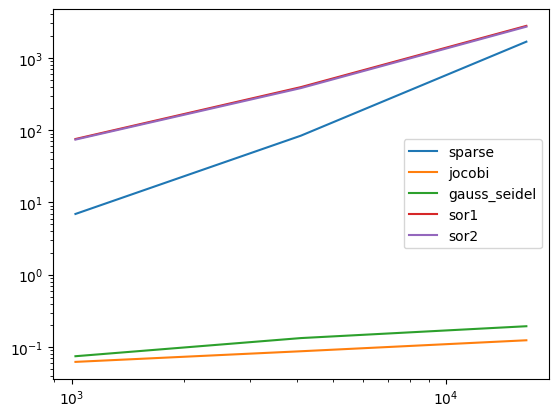

In [28]:
sparse = [6.94, 84.1, 1680]
jocobi = [0.0623, 0.0874, 0.124]
gauss_seidel = [0.0746, 0.133, 0.194]
sor1 = [75.6, 395, 2780]
sor2 = [74.2, 383, 2710]

size = [32*32, 64*64, 128*128]

plt.loglog(size, sparse, label='sparse')
plt.loglog(size, jocobi, label='jocobi')
plt.loglog(size, gauss_seidel, label='gauss_seidel')
plt.loglog(size, sor1, label='sor1', alpha=0.5)
plt.loglog(size, sor2, label='sor2', alpha=0.5)
plt.legend()